## Linear Regression

In this notebook lab, you will explore the data and apply linear regression. 
As you execute the cells, please also try to understand the code and the results, and think how to answer questions and follow instructions marked in <font color='purple'>purple</font> color.

First we need to input all the packages we need.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import datasets,linear_model
from sklearn.metrics import mean_squared_error, r2_score

Let's start experiments with linear regression modelling 4 different functions. 
In order to compare their performance, let's use R2 score.

<font color='purple'>Which function is the easiest and which is the hardest to model with linear regression (as measured by R2)?</font>

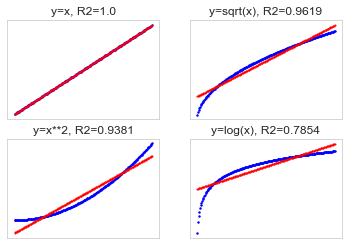

In [14]:
def original(x):
    return x

def square(x):
    return x*x

def change_func(N,func,noise_factor,title,i):
    data_x = np.arange(1,N).reshape(-1,1) #    Generate an array with values from 0 to N
    #.reshape(-1,1) makes 1 col and as many rows as data allows
    
    rdm = (np.random.rand(N-1)-0.5).reshape(-1,1) # Random noise generator. rand(N) returns N random numbers between 0 and 1
    data_y = (func(data_x) + rdm*noise_factor)  # different function wrt x, with noise

    # Create and train linear regression model 
    regr = linear_model.LinearRegression()
    regr.fit(data_x,data_y)
    predicted_y = regr.predict(data_x)
    metric = r2_score(data_y,predicted_y)
    plt.subplot(2,2,i)
    plt.title(title+", R2="+str(np.round(metric,4)))
    plt.scatter(data_x,data_y,color="b",s=2)
    plt.scatter(data_x,predicted_y,color="r",s=1)
    plt.xticks([]), plt.yticks([])
    return

N=200
plt.figure(1)
change_func(N,original,0,"y=x",1)
change_func(N,np.sqrt,0,"y=sqrt(x)",2)
change_func(N,square,0,"y=x**2",3)
change_func(N,np.log,0,"y=log(x)",4)
plt.show()

#### Reading Datasets

In order to perform machine learning, we typically need a significant amount of data. By understanding the data, analysing patterns and training our algorithms, we can achieve meaningful results. Scikit-learn makes it easy for us to access some pre-defined 'toy' datasets to practice our understanding.

In this example, we'll use the "Life expectancy" dataset adapted to this lab, which contains 500 records. More information about the original version of this dataset can be found
<a href="https://www.kaggle.com/kumarajarshi/life-expectancy-who/data#">here</a>

The 9 features in the dataset represent Infant deaths, Alcohol, Percentage expenditure, Hepatitis B,Measles, BMI, Total expenditure, Population and Schooling. The target of interest is Life expectancy. We'll use these fetures to find a regression to predict the target.
Later, we'll apply a linear regression to the data, but some features will be better suited to this than others.

<font color='purple'>Read through the code below to understand how this particular data is structured.</font>  

<font color='purple'>Try to find which feature has the most linear relationship with the target.</font>

### Data Exploration
First, we input the datset of diabetes

In [3]:
# load the diabetes dataset
df=pd.read_csv('life_expectancy.csv')
target_name="Life expectancy"
target=df[target_name]

In [17]:
df

,Life expectancy,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,Total expenditure,Population,Schooling
0,72.6,0,9.85,1137.623700,92,0,58.5,6.84,2141669.0,16.4
1,66.5,30,0.07,0.000000,63,0,51.3,4.36,25627626.0,9.4
2,73.3,1,3.67,192.322631,98,0,45.4,4.80,2728777.0,11.1
3,59.8,1,0.45,20.868787,25,24,3.9,7.72,8942.0,4.5
4,76.0,32,0.01,429.662508,61,15,57.2,5.26,32776571.0,10.5
...,...,...,...,...,...,...,...,...,...,...
495,85.0,2,8.20,771.181769,14,13,61.9,9.75,325755.0,15.8
496,46.2,4,2.69,9.184327,9,2,28.3,8.47,1982287.0,10.6
497,65.8,3,0.01,796.873426,84,86,33.3,8.24,2263934.0,11.5
498,71.8,4,2.05,13.390922,97,21,19.2,3.37,19968.0,13.4


In [20]:
print(target)

0      72.6
1      66.5
2      73.3
3      59.8
4      76.0
       ... 
495    85.0
496    46.2
497    65.8
498    71.8
499    72.3
Name: Life expectancy, Length: 500, dtype: float64


Sometimes you need to see the data plotted out to understand more. Seaborn is a library which is a wrapper over Matplotlib (the standard Python library for data plotting) and is extremely convenient to use. For example, the below plot shows a box plot of target values of all records.

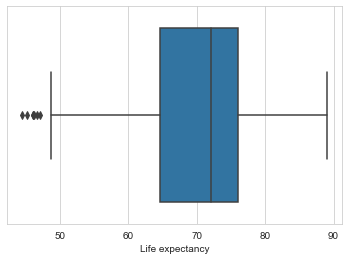

In [4]:
sns.set_style("whitegrid")
#Box plot (the 5 numbers:min, median1 to the left of median2, 
#  median2 of all median, median3 to the right of median2, max)
sns.boxplot(x=target) 
plt.show()

Using Seaborn, plot a scatter plot between schooling years and target value. 

<font color='purple'>Notice a number of outliers in this plot as well as in the box plot above.</font>

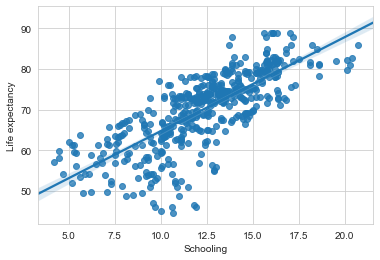

In [5]:
#TODO
sns.regplot(x='Schooling',y=target_name,data=df)
plt.show()

Try to plot target against a couple of other variables.

Let's now view the correlation heatmap for the different features for some more inspiration. 

<font color='purple'>Notice that some variables are negatively correlated with the target.</font>

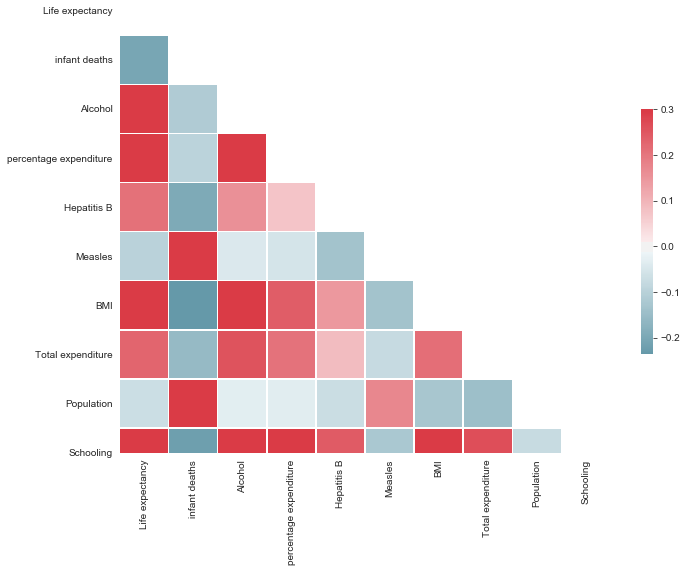

In [6]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True #True values in upper triangle

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

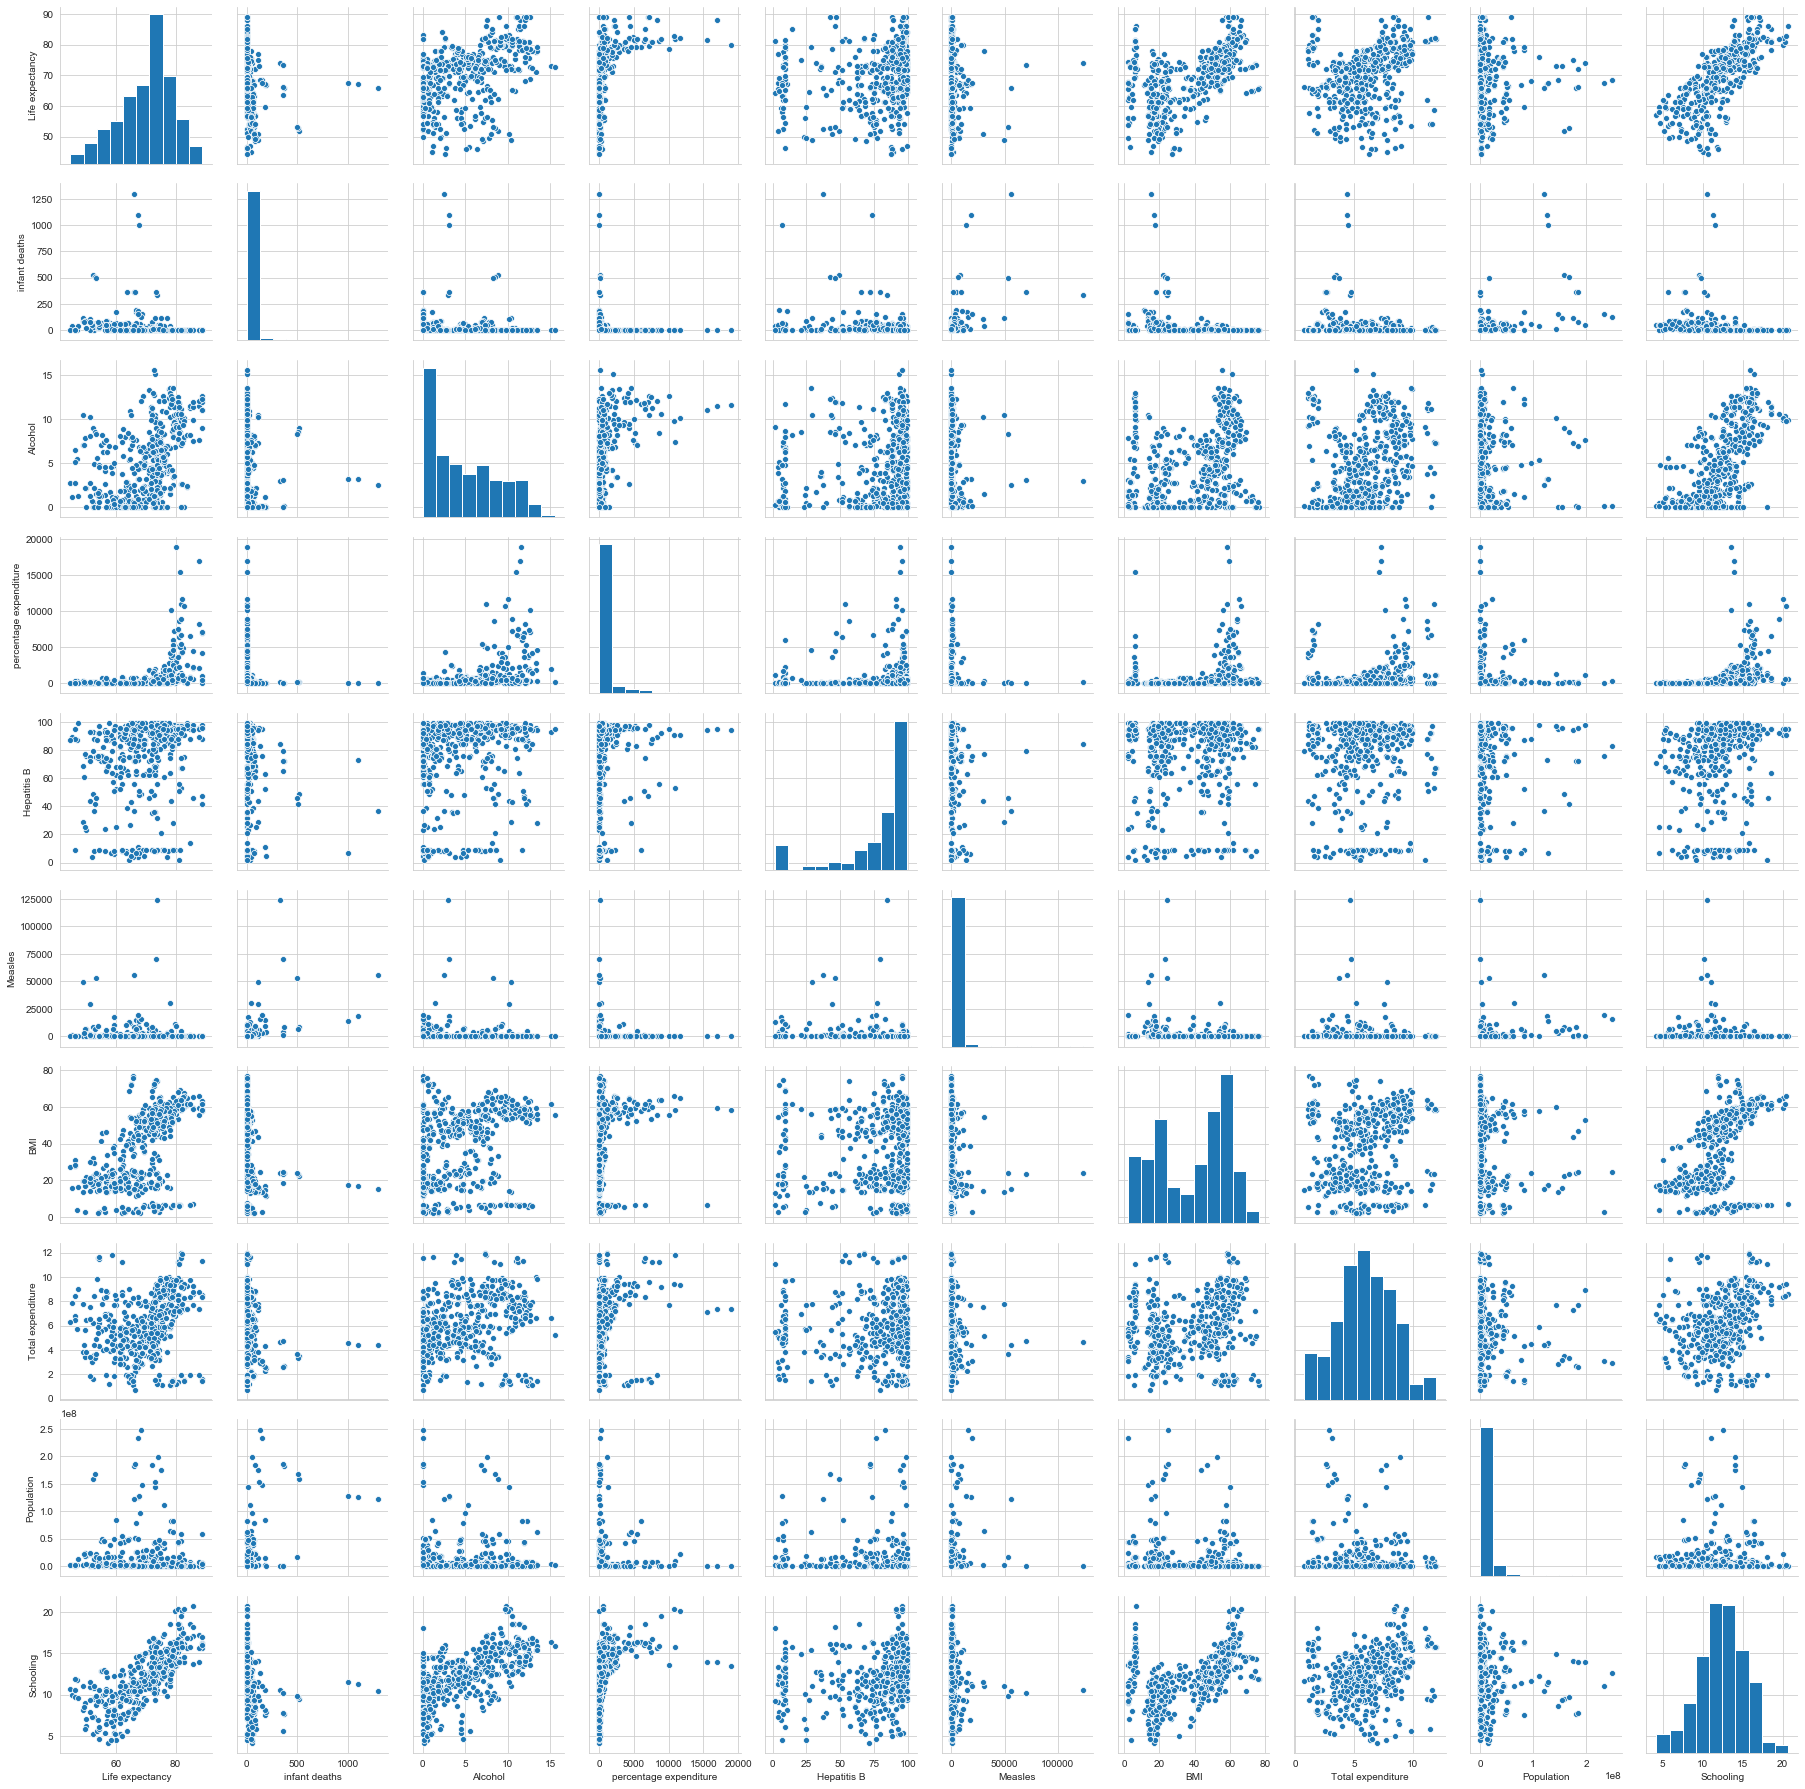

In [7]:
sns.pairplot(df)#
plt.show()

<font color='purple'>By looking at the above correlation plots, try to predict which variable will produce least MSE when used in the linear regression model.</font>

Now that we have a dataset loaded, and a feature of interest selected, we can try to fit a linear regression.  Scikit-learn has methods for accomplishing this very simply.  There are two steps involved:
1. Training the model: the linear regression model must be trained by supplying it with a sample feature set, and the corresponding targets.
2. Prediction: once the model is trained, you can provide it with a number of sample points and it will return its predicted targets.
After training the model, we can see the coefficients of the model; i.e., find the *regression coefficient* $a$ and the *intercept* $b$ in the (univariate) linear regression formula $y = ax + b$.
We can also calculate the mean squared error of the model points to give us something to compare models and feature choice.

<font color='purple'>Fill in the code necessary to load the dataset, train and visualise the linear regression.</font>

In [8]:
#use already loaded dataset

feature_name = "Schooling" ## <-- Whichever feature you chose

# your code here (based on the code given in the initial part of this notebook)

#Output the coefficient
print('Coefficients: ', regr.coef_[0], regr.intercept_)
#Calculate the Mean Squared Error
mse = np.mean((predicted_y - data_y) ** 2)
print ("Mean squared error: %.2f" % mse)

plt.scatter(data_x,data_y)
plt.plot(data_x,predicted_y,color="red")
plt.show()

NameError: name 'regr' is not defined

If done correctly, you should end up with a linear regression (i.e. straight line) which approximately follows the shape of the scattered data. You can try using other features in the dataset to see how the linearity of the data affects the MSE.

### Test vs. Training set
Typically, we do not want to test our model on the data with which we trained it, as this will not provide an accurate assessment of the model.  However, we only have a limited amount of data to work with in this case.  One way around this issue is to split the data into a 'training set' and a much smaller 'test set'.  In this example, we'll take 30% of the dataset to use as our test set, and leave the rest for training. 

The code below splits data into  test and training sets rather than the dataset as a whole.

<font color='purple'>
How is the mean squared error (MSE) affected when we test with the test set?  Why?
Try adjusting the test data size and see how the model accuracy is affected.</font>

In [ ]:
from sklearn.model_selection import train_test_split

# split data
train_x, test_x, train_y, test_y = train_test_split(
    data_x, data_y, test_size=0.30)
#Create linear regression model
regr = linear_model.LinearRegression()
#Train the model
regr.fit(train_x,train_y)
#Predict the targets
predicted_y =regr.predict(test_x)

#Output the coefficient
print('Coefficients: ', regr.coef_[0], regr.intercept_)
#Calculate the Mean Squared Error
mse = np.mean((predicted_y - test_y) ** 2)
print ("Mean squared error: %.2f" % mse)

plt.scatter(train_x,train_y)
plt.scatter(test_x,test_y, color="red")
plt.plot(test_x,predicted_y,color="red")
plt.show()

Other kinds of measure for linear regression are used:

In [ ]:
from sklearn.metrics import explained_variance_score,mean_squared_error,r2_score
def performance_metrics(y_true,y_pred):
    rmse = mean_squared_error(y_true,y_pred)
    r2 = r2_score(y_true,y_pred)
    explained_var_score = explained_variance_score(y_true,y_pred)
    y = np.array([13, 8, 11, 2, 6])
    x = np.array([3, 6, 7, 8, 11])
    return rmse,r2,explained_var_score

rmsa,r2,explained_var_score=performance_metrics(test_y,predicted_y)
print ("Root of mean squared error: %.2f" % rmsa)
print ("R2-score: %.2f" % r2)
# explained_variance_score is shown in lecture alide 96 as R-squared: 
#  1-(variance(pred-target)/variance(pred-mean))
print ("Explained variance score: %.2f" % explained_var_score)

In the last part of this notebook you will explore local regression applied to variety of target functions. For this purpose let's modify the code used in the first part of ths lab replacing linear regression with local regression. Run the code below and try answering the following questions:

<font color='purple'>
For which target functions local regression performs better than linear regression and why?
</font>

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

def original(x):
	return x

def square(x):
	return x*x

def change_func(N,func,noise_factor,title,i):
    data_x = np.arange(1,N).reshape(-1,1) #    Generate an array with values from 0 to N
    #.reshape(-1,1) makes 1 col and as many rows as data allows
    rdm = (np.random.rand(N-1)-0.5).reshape(-1,1) # Random noise generator. rand(N) returns N random numbers between 0 and 1
    data_y = (func(data_x) + rdm*noise_factor)  # different function wrt x, with noise
    # Create and train linear regression model 
    regr = KNeighborsRegressor(n_neighbors=5)
    regr.fit(data_x,data_y)
    predicted_y = regr.predict(data_x)
    metric = r2_score(data_y,predicted_y)
    plt.subplot(2,2,i)
    plt.title(title+", R2="+str(np.round(metric,4)))
    plt.scatter(data_x,data_y,color="b",s=2)
    plt.scatter(data_x,predicted_y,color="r",s=1)
    plt.xticks([]), plt.yticks([])
    return

N=200
plt.figure(1)
change_func(N,original,0,"y=x",1)
change_func(N,np.sqrt,0,"y=sqrt(x)",2)
change_func(N,square,0,"y=x**2",3)
change_func(N,np.log,0,"y=log(x)",4)
plt.show()

In [ ]:
import numpy as np
from numpy.linalg import inv

x = np.matrix([[1,3],[1,6],[1,7],[1,8],[1,11]])
y = np.array([13,8,11,2,6])



In [ ]:
x

In [ ]:
y

In [ ]:
xtxi = inv(np.matmul(np.transpose(x),x))
xtxixt = np.matmul(xtxi,np.transpose(x))
coeffcients = np.matmul(xtxixt,y)


In [ ]:
xtxi

In [ ]:
coeffcients

In [ ]:
print(coeffcients)
